In [1]:
import warnings
warnings.filterwarnings ('ignore')
import os
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Objective

To complete the analysis of what sorts of people were likely to survive the Titanic mishap by appling the tools of machine learning to predict which passengers survived the tragedy.

In [2]:
df = pd.read_csv(r'D:\Data Analytics Notes\IMS Project\train.csv')
#Importing our dataset

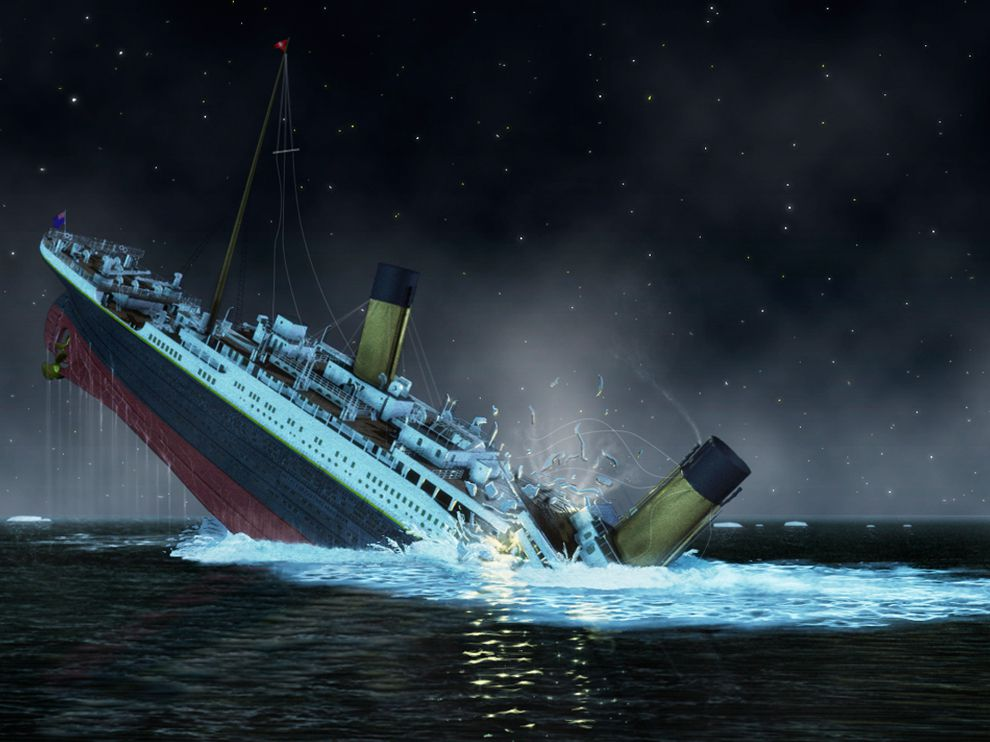

# 1) Data Pre-processing

In [3]:
df.info()
#checking for dtypes of our variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()
#checking all the heads of our data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.a) Checking for Null Values

In [5]:
df.isna().sum()
#checking for any null values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see, we have null values for 177 rows in Age, 687 rowns in Cabin and 2 rows in Embarked

### 1.b) Treating Null Values

In [6]:
df.Embarked.value_counts(dropna=False)
#We have a look at the breakup of the 891 rows under embarked column, we see 2 null values.
#We will replace null values with Mode of the Embarked Variable.

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [7]:
for column in ['Embarked']:
    df[column].fillna(df[column].mode()[0], inplace= True)
    
#We replace Nan values with Mode in the Embarked column.

In [8]:
df.Embarked.value_counts(dropna=False)
#We can check that the Nan values have now been replaced with our mode, i.e. S. Earlier S was 644 but now it is 646.

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df['Age'].fillna(df['Age'].median(skipna=True), inplace=True)
#Similarly, we are filling up missing age values with Median of Age.

### 1.c) Creating our Final Dataset

In [10]:
df = df.drop(['Name','PassengerId','Ticket'], axis = 1)
#Here we are dropping all the irrelevant columns, which have no relation to survival.

In [11]:
df.head()
#Checking how our dataset looks after all the alteration so far.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [12]:
df ['Alone'] = df.SibSp + df.Parch
#We create a new column called Alone, Here we add the two columns SibSp and Parch.
#Both these columns indicate the number of people there were with a particular passenger.

In [13]:
df['Alone'].loc[df['Alone']>0] = 'No'
df['Alone'].loc[df['Alone']==0]= 'Yes'
#We convert the numerical ranges of the Alone column into categories. 
#Where if alone = 0, then alone is Yes and if Alone>0, then Alone = No.

In [14]:
df= df.drop(['SibSp','Parch'], axis = 1)
#as we have already made a better treatment for the columns SibSp and Parch, we now drop them.

In [15]:
df.Sex=(LabelEncoder().fit_transform(df.Sex)) #We convert Sex into numerical data - 0 = Female, 1 = Male.
df.Alone=(LabelEncoder().fit_transform(df.Alone)) #We convert Alone into numerical data - 0 = No, 1 = Yes.

In [16]:
df.head()
#How the data set looks after the last few alterations.

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Alone
0,0,3,1,22.0,7.2500,NaN,S,0
1,1,1,0,38.0,71.2833,C85,C,0
2,1,3,0,26.0,7.9250,NaN,S,1
3,1,1,0,35.0,53.1000,C123,S,0
4,0,3,1,35.0,8.0500,NaN,S,1


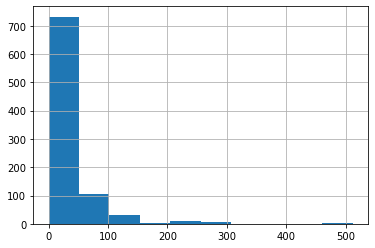

In [17]:
df.Fare.hist()
plt.show()  # Positive Skewed ,

In [18]:
df.info() #Checking the Data types of our columns again.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     204 non-null    object 
 6   Embarked  891 non-null    object 
 7   Alone     891 non-null    int32  
dtypes: float64(2), int32(2), int64(2), object(2)
memory usage: 48.9+ KB


In [19]:
convert_dict = {'Embarked' : str, 'Survived': float}
df = df.astype(convert_dict)
#Converting Embarked and Survived into desired format, Strings and Float respectively, so we can further work on them. 

In [20]:
df.Embarked = (LabelEncoder().fit_transform(df.Embarked))
#We convert Embarked into numerical data - 0 = Cherbourg; 1 = Queenstown; 2 = Southampton.

In [21]:
df.head()
#Final dataset is ready to work on.

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Alone
0,0.0,3,1,22.0,7.2500,NaN,2,0
1,1.0,1,0,38.0,71.2833,C85,0,0
2,1.0,3,0,26.0,7.9250,NaN,2,1
3,1.0,1,0,35.0,53.1000,C123,2,0
4,0.0,3,1,35.0,8.0500,NaN,2,1


# 2) Checking for outliers

<AxesSubplot:>

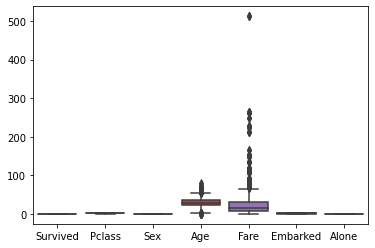

In [22]:
sns.boxplot(data = df) #Checking for outliers in our dataset. We see that Age and Fare have outliers.

### 2.a) Treating outliers in Age variable

In [23]:
q1 = df['Age'].quantile(0.25) #Defining Q1 formula for Age Variable
q3 = df['Age'].quantile(0.75) #Defining Q3 formula for Age Variable
iqr = q3-q1 #Interquartile Range 
upperlimit = q3+1.5*iqr #Highest Accepted Value for Age Variable
lowerlimit = q1-1.5*iqr #Lowest Accepted Value for Age Variable
upperlimit, lowerlimit

(54.5, 2.5)

In [24]:
df['Age'] = np.where(df['Age']>upperlimit, upperlimit, df['Age']) #We have replaced the upper outliers with the Upper Limit we found in the above step for Age Variable
df['Age'] = np.where(df['Age']<lowerlimit, lowerlimit, df['Age']) #We have replaced the lower outliers with the Lower Limit we found in the above step for Age Variable

<AxesSubplot:ylabel='Age'>

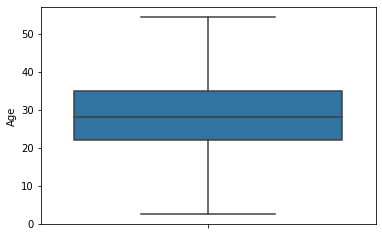

In [25]:
sns.boxplot(y = 'Age', data=df)
#Now we can see that the outliers have been removed from our Age Data

### 2.b) Treating outliers in Fare variable

<AxesSubplot:ylabel='Fare'>

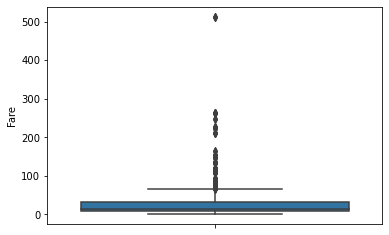

In [26]:
sns.boxplot(y = 'Fare', data=df)

In [27]:
q1 = df['Fare'].quantile(0.25) #Defining Q1 formula for Fare Variable
q3 = df['Fare'].quantile(0.75) #Defining Q3 formula for Fare Variable
iqr = q3-q1 #Interquartile Range
upperlimit = q3+1.5*iqr #Highest Accepted Value for Fare Variable
lowerlimit = q1-1.5*iqr #Lowest Accepted Value for Fare Variable
upperlimit, lowerlimit

(65.6344, -26.724)

In [28]:
df['Fare'] = np.where(df['Fare']>upperlimit, upperlimit, df['Fare'])
#We have replaced the upper outliers with the Upper Limit we found in the above step for Fare Variable.

<AxesSubplot:ylabel='Fare'>

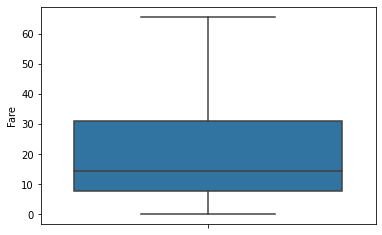

In [29]:
sns.boxplot(y= 'Fare', data = df)
#Now we can see that the outliers have been removed from our Fare Data.

In [30]:
df.describe() #Having a look at overall values of our data after correction.

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.039282,24.046813,1.536476,0.602694
std,0.486592,0.836071,0.477990,12.072074,20.481625,0.791503,0.489615
min,0.000000,1.000000,0.000000,2.500000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,1.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,14.454200,2.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,54.500000,65.634400,2.000000,1.000000


# 3) Checking our data model using Train Test Split method

In [31]:
X = df.drop(['Survived'] , axis = 1) #Seperating our X (Independent Variables) from data set.
Y = df[['Survived']]  #Seperating our Y (Dependent Variables) from data set.
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, random_state = 100)
#Splitting X & Y into Train Data which has 70% of toal data and Test Data which has 30% of total data.

In [32]:
X_train.head() #Having a look at X_train data to see if it has been seggregated correctly.

,Pclass,Sex,Age,Fare,Cabin,Embarked,Alone
69,3,1,26.0,8.6625,NaN,2,0
85,3,0,33.0,15.8500,NaN,2,0
794,3,1,25.0,7.8958,NaN,2,1
161,2,0,40.0,15.7500,NaN,2,1
815,1,1,28.0,0.0000,B102,2,1


In [33]:
Y_train.head() #Having a look at Y_train data to see if it has been seggregated correctly.

,Survived
69,0.0
85,1.0
794,0.0
161,1.0
815,0.0


In [34]:
train = pd.concat([X_train, Y_train], axis = 1) #We create a new dataset, where we have joined X_train and Y_train.
train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Alone,Survived
69,3,1,26.0,8.6625,NaN,2,0,0.0
85,3,0,33.0,15.8500,NaN,2,0,1.0
794,3,1,25.0,7.8958,NaN,2,1,0.0
161,2,0,40.0,15.7500,NaN,2,1,1.0
815,1,1,28.0,0.0000,B102,2,1,0.0


In [35]:
train.info() #Checking dtypes for train data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 69 to 520
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Sex       623 non-null    int32  
 2   Age       623 non-null    float64
 3   Fare      623 non-null    float64
 4   Cabin     150 non-null    object 
 5   Embarked  623 non-null    int32  
 6   Alone     623 non-null    int32  
 7   Survived  623 non-null    float64
dtypes: float64(3), int32(3), int64(1), object(1)
memory usage: 36.5+ KB


# 4) Running logit model to check dependency of survived on other variables.

*  H0 :- There is no Linear relationship between sales and tv , radio & newspaper

* Vs 

*  H1 :- There is Linear relationship between sales and tv , radio & newspaper

Alpha = 0.05

In [36]:
result=smf.logit(formula="Survived~Pclass+Sex+Age+Fare+Embarked+Alone",data=train).fit()
result.summary()
#Here we run an Logit model to see on which Independent (X) variables is our Survived (Y) most dependent.

Optimization terminated successfully.
         Current function value: 0.442177
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            6
Date:                Mon, 11 Oct 2021   Pseudo R-squ.:                  0.3311
Time:                        11:55:38   Log-Likelihood:                -275.48
converged:                       True   LL-Null:                       -411.83
Covariance Type:            nonrobust   LLR p-value:                 5.696e-56
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3295      0.868      6.138      0.000       3.628       7.031
Pclass        -1.2183      0.200     -6.106      0.000      -1.609      -0.827
Sex           -2.6940      0.237    -11.388      0.000      -3.158      -2.230
Age           -0.0337      0.010     -3.432      0.001      -0.053      -0.014
Fare          -0.0044      0.009     -0.504      0.614      -0.021       0.013
Embarked      -0.2747      0.136     -2.018      0.044      -0.542      -0.008
Alone         -0.0122      0.273     -0.045      0.964      -0.547       0.523
==============================================================================
"""

We see, Alone has a value greater than alpha and overall highest P-value in this data.
Hence we remove Alone and run the model again.

In [37]:
result=smf.logit(formula="Survived~Pclass+Sex+Age+Fare+Embarked",data=train).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.442178
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                            5
Date:                Mon, 11 Oct 2021   Pseudo R-squ.:                  0.3311
Time:                        11:55:38   Log-Likelihood:                -275.48
converged:                       True   LL-Null:                       -411.83
Covariance Type:            nonrobust   LLR p-value:                 7.319e-57
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3138      0.794      6.691      0.000       3.757       6.870
Pclass        -1.2157      0.191     -6.368      0.000      -1.590      -0.842
Sex           -2.6963      0.231    -11.682      0.000      -3.149      -2.244
Age           -0.0338      0.010     -3.466      0.001      -0.053      -0.015
Fare          -0.0042      0.007     -0.579      0.563      -0.018       0.010
Embarked      -0.2744      0.136     -2.019      0.043      -0.541      -0.008
==============================================================================
"""

We see, Fare has a value greater than alpha and overall highest P-value among the remaining variables. Hence we remove Fare and run the model again.

In [38]:
result=smf.logit(formula="Survived~Pclass+Sex+Age+Embarked",data=train).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.442449
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      618
Method:                           MLE   Df Model:                            4
Date:                Mon, 11 Oct 2021   Pseudo R-squ.:                  0.3307
Time:                        11:55:38   Log-Likelihood:                -275.65
converged:                       True   LL-Null:                       -411.83
Covariance Type:            nonrobust   LLR p-value:                 9.811e-58
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0068      0.588      8.511      0.000       3.854       6.160
Pclass        -1.1440      0.145     -7.892      0.000      -1.428      -0.860
Sex           -2.6733      0.227    -11.783      0.000      -3.118      -2.229
Age           -0.0331      0.010     -3.424      0.001      -0.052      -0.014
Embarked      -0.2666      0.135     -1.970      0.049      -0.532      -0.001
==============================================================================
"""

We see, None of the variables have P-value greater than Alpha.

Hence, There is a log linear relationship between Survived, Pclass, Sex, Age, Embarked.

# 5) Odds Ratio

In [39]:
Model_Odds = pd.DataFrame(np.exp(result.params), columns=['Odds_Ratio']) #Finding Odds Ratio of the Data.
Model_Odds

,Odds_Ratio
Intercept,149.423580
Pclass,0.318527
Sex,0.069025
Age,0.967420
Embarked,0.766004


# 6) Prediction on Train Dataset

In [40]:
train['Probability']=result.predict(train) #we create a column called Probability which predicts chances of Survival.
train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Alone,Survived,Probability
69,3,1,26.0,8.6625,NaN,2,0,0.0,0.076354
85,3,0,33.0,15.8500,NaN,2,0,1.0,0.487121
794,3,1,25.0,7.8958,NaN,2,1,0.0,0.078723
161,2,0,40.0,15.7500,NaN,2,1,1.0,0.702800
815,1,1,28.0,0.0000,B102,2,1,0.0,0.432637


In [41]:
train['Predicted'] = np.where(train['Probability']>0.7,1,0)
train.head()
#We create a new column called Predicted, where Probability Values > 0.7 = 1 (Survived) and values < 0.7 = 0 (Died).

,Pclass,Sex,Age,Fare,Cabin,Embarked,Alone,Survived,Probability,Predicted
69,3,1,26.0,8.6625,NaN,2,0,0.0,0.076354,0
85,3,0,33.0,15.8500,NaN,2,0,1.0,0.487121,0
794,3,1,25.0,7.8958,NaN,2,1,0.0,0.078723,0
161,2,0,40.0,15.7500,NaN,2,1,1.0,0.702800,1
815,1,1,28.0,0.0000,B102,2,1,0.0,0.432637,0


# 7) Model Performance Metrics on Train dataset

In [42]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Survived'])
print(matrix)
#We create a Confusion Matrix to see if our Model is good or not.

[[382 118]
 [  8 115]]


In [43]:
Accuracy_train = ((382+115)/(623)) 
Accuracy_train
#We divide the sum of Values - True Positive (382) and True Negative (115) by total number of rows, 623 in our train data.

0.797752808988764

Our Accuracy is 79%, hence it is a good model.

In [44]:
from sklearn.metrics import classification_report
print(classification_report(train['Survived'], train['Predicted']))

              precision    recall  f1-score   support

         0.0       0.76      0.98      0.86       390
         1.0       0.93      0.49      0.65       233

    accuracy                           0.80       623
   macro avg       0.85      0.74      0.75       623
weighted avg       0.83      0.80      0.78       623



Model's specificity = 0.98;
Model's Sensitivity = 0.49;
Model's Precision = 0.76 and 0.93.

* Accuracy of Survived prediction is 49%.
* Accuracy of Died Prediction is 98%.
* Accuracy of Predicted Survival and often correct is 93%.
* Accuracy of Predicted Died and often correct is 76%

# Graphical Representation

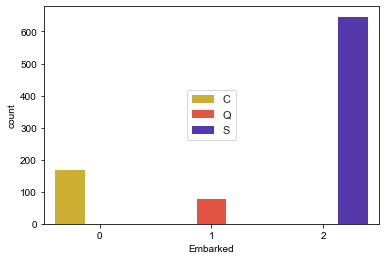

In [45]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Embarked', data=df, hue="Embarked",palette='CMRmap_r')
sns.set_theme(style="whitegrid")
ax.legend(loc='center',labels=['C','Q','S'])
plt.show()

Most of the people boarded the ship from Southampton port.

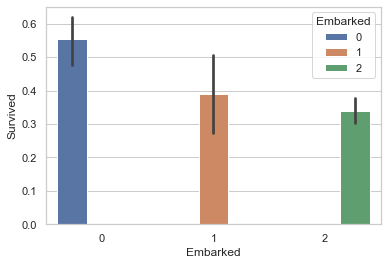

In [46]:
tt = sns.barplot(x='Embarked',y='Survived', hue='Embarked', data=df)
plt.show()
# [0 = Cherbourg; 1 = Queenstown; 2 = Southampton]

We see that people from Cherbourg had the highest survival rate.

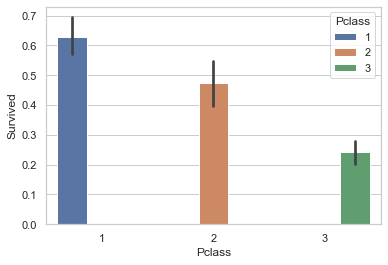

In [47]:
gh = sns.barplot(x='Pclass',y='Survived', hue='Pclass', data=df)
plt.show()

People from first class were given preference while being saved and most of the survivors were first class passengers.

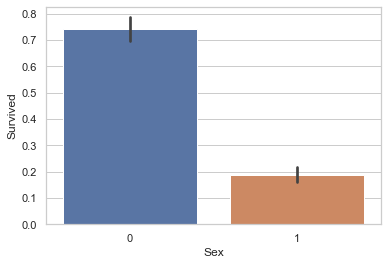

In [48]:
mf = sns.barplot(x='Sex',y='Survived', data=df)
plt.show()
#0 - female, 1- male

We see that more females survived than male. There is a possibility that females were given preference over males while taking the lifeboat.

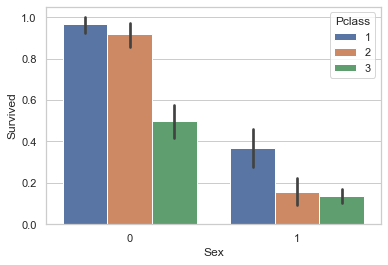

In [49]:
rt = sns.barplot(x='Sex',y='Survived', hue='Pclass', data=df)
plt.show()

Most of the survivors from both the gender were forst class passengers.

In [50]:
data = df.copy() #making a copy of data for some further analysis.

In [51]:
def age_group(data) : 
    if data['Age'] <= 18 :
        return 'Children'
    elif (data['Age'] > 18) & (data['Age'] < 50) :
        return 'Adult'
    elif (data['Age'] > 50) :
        return 'Old'
    
data['Age'] = data.apply(lambda
                        data:age_group(data),axis=1)
# Making ranges of people considering their ages.

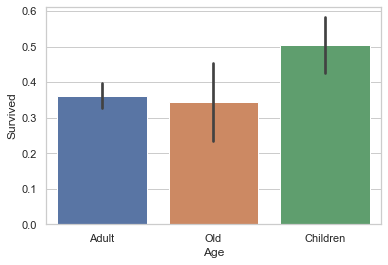

In [52]:
rt = sns.barplot(x='Age',y='Survived', data=data)
plt.show()

We see that most number of survivors were less than 18. Old people were most vulnerable and many could not be saved.